# 6.5.3 PCR and PLS Regression

In [1]:
require(ISLR2)
Hitters <- na.omit(Hitters)
x <- model.matrix(Salary ~ ., Hitters)[,-1]
y <- Hitters$Salary
set.seed(1)
train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]

Loading required package: ISLR2



## Principal Components Regression
Principal components regression (PCR) can be performed using the `pcr()` function which is part of the `pls` library. We now apply PCR to the `Hitters` data in order to predict `Salary`. Again, we ensure that the missing values have been removed from the data, as described in Section 6.5.1.

In [2]:
require(pls)
set.seed(2)

Loading required package: pls


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [3]:
pcr.fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")

The syntax for the `pcr()` function is similar to that for `lm()`, with a few additional options. Setting `scale = TRUE` has the effect of _standardizing_ each predictor, using (6.6), prior to generating the principal components, so that the scale on which each variable is measured will not have an effect. Setting `validation = "CV"` causes `pcr()` to compute the ten-fold cross-validation error for each possible value of $M$, the number of principal components used. The resulting fit can be examined using `summary()`.

In [4]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The CV score is provided for each possible number of components, ranging from $M=0$ onwards. (We have printed the CV output up to $M=4$.) Note that `pcr()` reports the _root mean squared error_; in order to obtain the usual MSE, we must square this quantity. For instnce, a root mean squared error of $352.8$ corresponds to an MSE of $352.8^2=124,468$.  

One can also plot the cross-validation scores using the `validationplot()` function. Using `val.type="MSEP"` will cause the cross-validation MSE to be plotted.

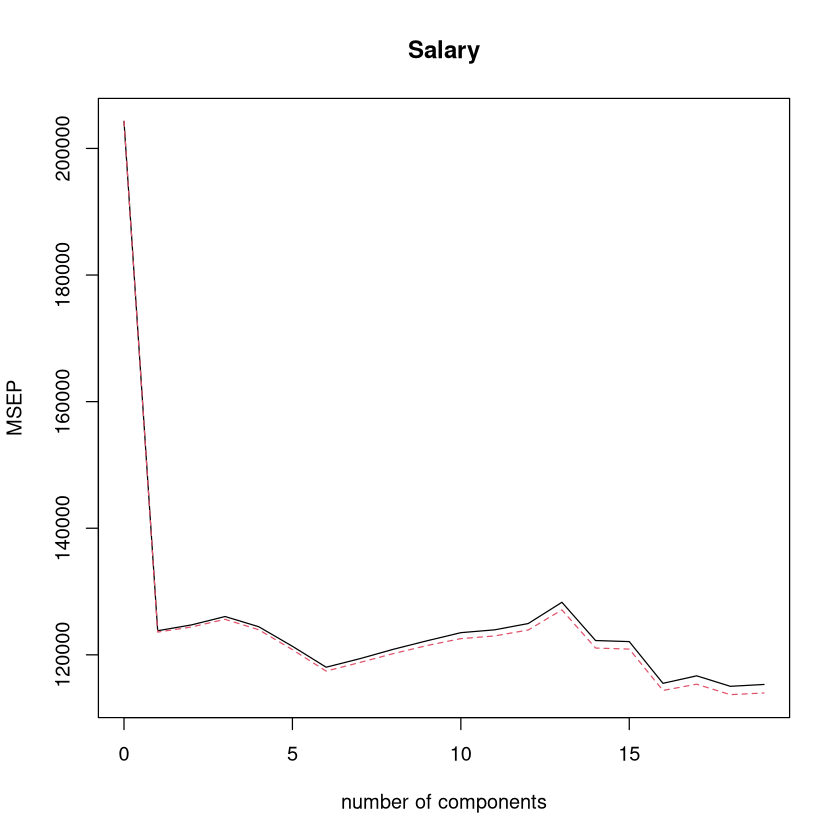

In [5]:
validationplot(pcr.fit, val.type = "MSEP")

We see that the smallest cross-validation error occurs when $M=18$ components are used. This is barely fewer than $M=19$, which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.  

The `summary()` function also provides the _percentage of variance explained_ in the predictors and in the response using different numbers of components. This concept is discussed in greater detail in Chapter 12. Briefly, we can think of this as the amount of information about the predictors or the response that is captured using $M$ principal components. For example, setting $M=1$ only captures $38.31\%$ of all the variance, or information, in the predictors. In contrast, using $M=5$ increases the value to $84.29\%$. If we were to use all $M=p=19$ components, this would increase to $100\%$. We now perform PCR on the training data and evaluate its test set performance.

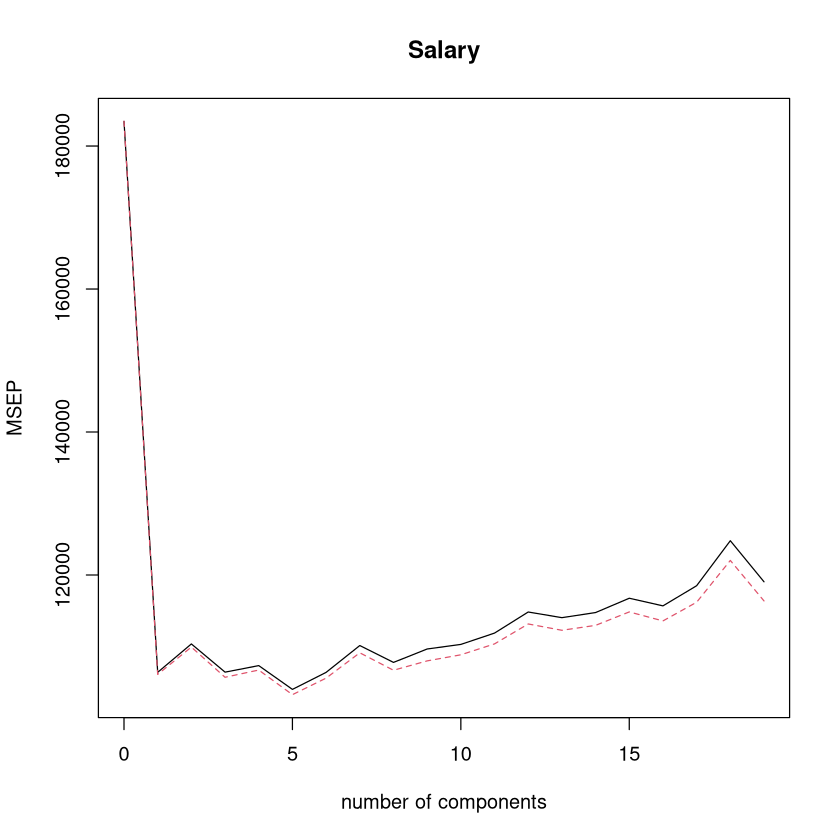

In [6]:
set.seed(1)
pcr.fit <- pcr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

Now we find that the lowest cross-validation error occurs when $M=5$ components are used. We compute the test MSE as follows

In [7]:
pcr.pred <- predict(pcr.fit, x[test,], ncomp = 5)
mean((pcr.pred - y.test)^2)

[1] 142811.8

This test set MSE is competitive with the results obtained using ridge regression and the lasso. However, as a result of the way PCR is implemented, the final model is more difficult to interpret because it does not perform any kind of variable selection or even directly produce coefficient estimates.  

Finally, we fit PCR on the full data set, using $M = 5$, the number of components identified by cross-validation.

In [8]:
pcr.fit <- pcr(y ~ x, scale = TRUE, ncomp = 5)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90


### Partial Least Squares
We implement partial least squares (PLS) using the `plsr()` function, also in the `pls` library. The syntax is just like that of the `pcr()` function.

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

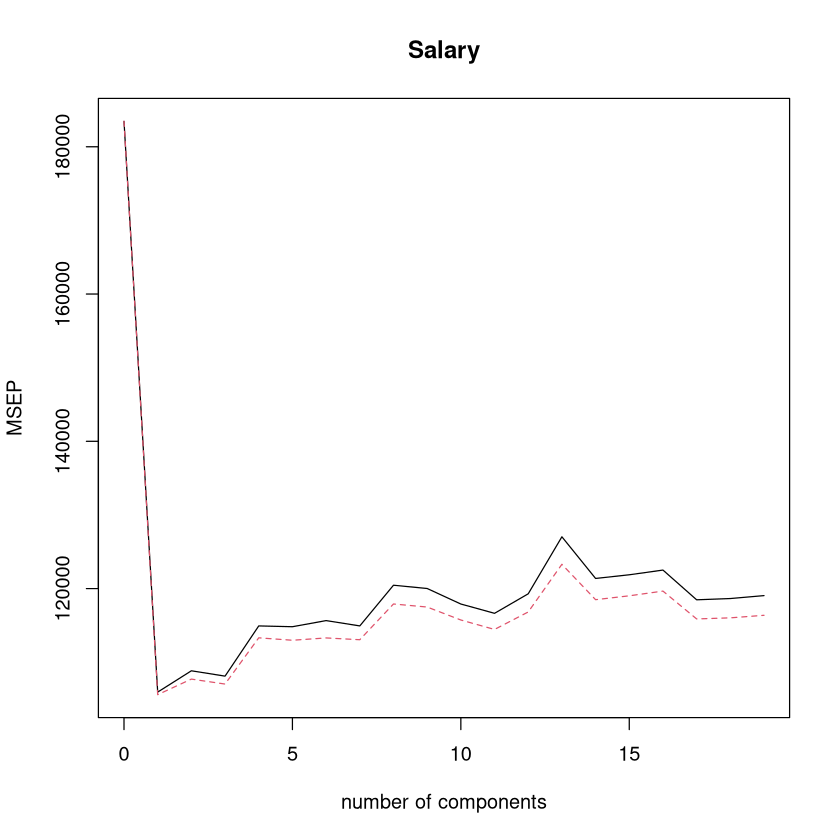

In [9]:
set.seed(1)
pls.fit <- plsr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")
summary(pls.fit)
validationplot(pls.fit, val.type = "MSEP")

The lowest cross-validation error occurs when only $M = 1$ partial least squares directions are used. We now evaluate the corresponding test set MSE.

In [10]:
pls.pred <- predict(pls.fit, x[test,], ncomp = 1)
mean((pls.pred - y.test)^2)

[1] 151995.3

The test MSE is comparable to, but slightly higher than, the test MSE obtained using ridge regression, the lasso, and PCR.  

Finally, we perform PLS using the full data set, using $M = 1$, the number of components identified by cross-validation.

In [11]:
pls.fit <- plsr(Salary ~ ., data = Hitters, scale = TRUE, ncomp = 1)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 1
TRAINING: % variance explained
        1 comps
X         38.08
Salary    43.05


Notice that the percentage of variance in `Salary` that the one-compoenent PLS fit explains, $43.05\%$, is almost as much as that explained using the final five-component model PCR fit, $44.90\%$. This is because PCR only attempts to maximize the amount of variance explained in the predictors, while PLS searches for directions that explain variance in both the predictors and the response.